## Volumetric Method for Geothermal Resource Capacity Estimation

$$H=\frac{Ah[(1-\phi)\rho_r c_r + \phi \rho_L c_L](T_i-T_f)R_{f} \eta}{t \times 365 \times 24 \times 3600 \times 1000}$$

Where :
- $ H= $ Resource capacity (MWe)
- $ A= $ Reservoir area $(m^2)$
- $ h= $ Reservoir thickness (m)
- $ \phi=$ Porosity (%)
- $ T_f= $ Cut-off Temperature $(^{\circ}C)$
- $ T_i= $ Reservoir temperature $(^{\circ}C)$
- $ c_r= $ Rock specific heat capacity $(kJ/kg^{\circ}C)$
- $ c_L= $ Fluid specific heat capacity $(kJ/kg^{\circ}C)$
- $ \rho_r= $ Rock density $(kg/m^3)$
- $ \rho_L= $ Fluid density $(kg/m^3)$
- $ R_f= $ Recovery factor
- $ \eta= $ Conversion efficiency
- $ t= $ Plant life (year)

### Parameters Setting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

These parameters are kept fixed.

In [2]:
# Fixed parameters
reserv_area = 6000000 # Reservoir area is ~6 km^2
reserv_thickness = 650 # Reservoir thickness is ~0.65 km
reserv_temp = 150 
cutoff_temp = 100
density_fluid = 748.67
c_fluid = 5.34
plant_life = 30 

These parameters are randomized with the following distribution.
| Parameters                            | Min  | Max  | Distribution |
|---------------------------------------|------|------|--------------|
| Porosity (%)                          | 3    | 15   | Rectangular  |
| Rock Density $(kg/m^3)$               | 2350 | 2670 | Rectangular  |
| Rock Specific Heat $(kJ/kg^{\circ}C)$ | 0.8  | 1    | Rectangular  |
| Recovery Factor                       | 0.25 | 0.5  | Triangular   |
| Efficiency Factor                     | 0.1  | 0.15 | Triangular   |

In [3]:
# MINIMUM PARAMETERS
# Rock-fluid parameters
porosity_min = 0.03 
density_rock_min = 2350
c_rock_min = 0.8

# Plant parameters
rec_factor_min = 0.25
eff_factor_min = 0.1

# MAXIMUM PARAMETERS
# Rock-fluid parameters
porosity_max = 0.15
density_rock_max = 2670
c_rock_max = 1

# Plant parameters
rec_factor_max = 0.50
eff_factor_max = 0.15

In [4]:
def calc_heat(A, h, phi, rho_r, rho_L, c_r, c_L, T_i, T_f, R_f, eta, t):
    H = (A*h*((1-phi)*rho_r*c_r+phi*rho_L*c_L)*(T_i-T_f)*R_f*eta)/(t*365*24*3600*1000)
    return H

# NUMBER OF SIMULATIONS
N = 10000
H_arr = np.zeros(N)
porosity_arr = np.zeros(N)
density_rock_arr = np.zeros(N)
c_rock_arr = np.zeros(N)
rec_factor_arr = np.zeros(N)
eff_factor_arr = np.zeros(N)

def heat_resource(): 
    for i in range(N):
        # Get random uniform distribution
        porosity = np.random.uniform(porosity_min, porosity_max)
        density_rock = np.random.uniform(density_rock_min, density_rock_max)
        c_rock = np.random.uniform(c_rock_min, c_rock_max)
        rec_factor = np.random.triangular(rec_factor_min, (rec_factor_min+rec_factor_max)/2, rec_factor_max)
        eff_factor = np.random.triangular(eff_factor_min, (eff_factor_min+eff_factor_max)/2, eff_factor_max)

        porosity_arr[i] = porosity
        density_rock_arr[i] = density_rock
        c_rock_arr[i] = c_rock
        rec_factor_arr[i] = rec_factor
        eff_factor_arr[i] = eff_factor

        # Calculate heat resource
        H_i = calc_heat(reserv_area, reserv_thickness, porosity, density_rock, density_fluid, 
                        c_rock, c_fluid, reserv_temp, cutoff_temp, rec_factor, eff_factor, plant_life)
        H_arr[i] = H_i

heat_resource()

### The Monte Carlo Simulation for N=10,000 Simulations

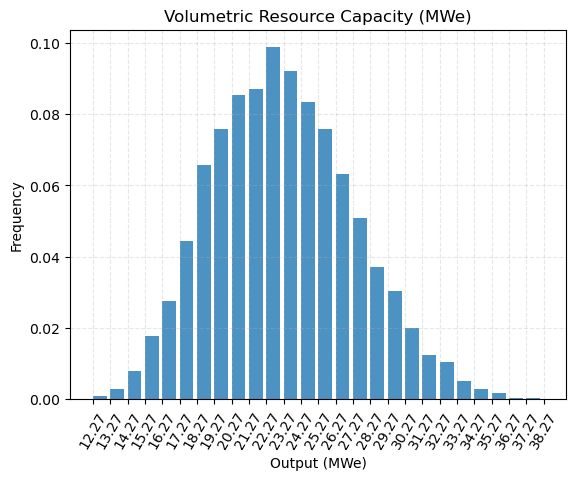

In [5]:
# Plot the CDF histogram
plt.hist(H_arr, bins=np.arange(min(H_arr), max(H_arr)+1, 1), density=True, width=0.8, alpha=0.8)
plt.title("Volumetric Resource Capacity (MWe)")
plt.xlabel("Output (MWe)")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(H_arr), max(H_arr)+1, 1), rotation=60)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

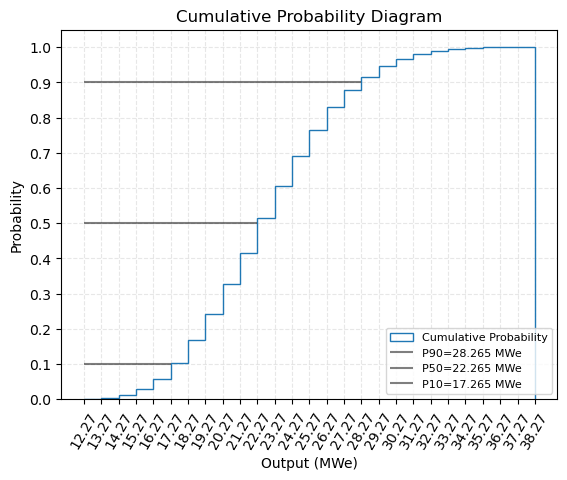

In [6]:
# Plot the CDF
plot = plt.hist(H_arr, bins=np.arange(min(H_arr), max(H_arr)+1, 1), histtype="step", 
         density=True, cumulative=1, label="Cumulative Probability")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(H_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f} MWe".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(H_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f} MWe".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(H_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f} MWe".format(plot[1][x_max_P10]))
plt.title("Cumulative Probability Diagram")
plt.xlabel("Output (MWe)")
plt.ylabel("Probability")
plt.xticks(np.arange(min(H_arr), max(H_arr)+1, 1), rotation=60)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()

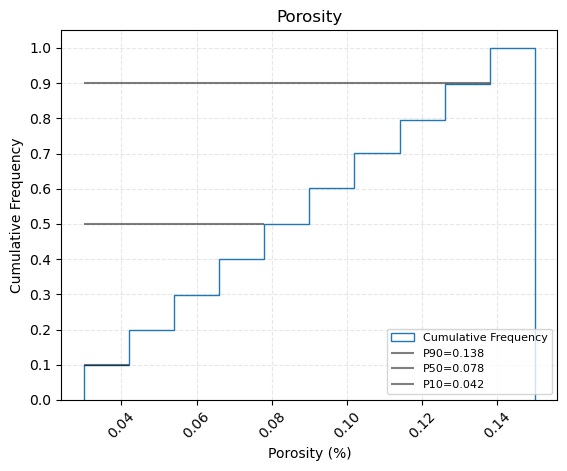

In [7]:
# Plot the CDF
plot = plt.hist(porosity_arr, histtype="step", 
         density=True, cumulative=1, label="Cumulative Frequency")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(porosity_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f}".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(porosity_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f}".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(porosity_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f}".format(plot[1][x_max_P10]))
plt.title("Porosity")
plt.xlabel("Porosity (%)")
plt.ylabel("Cumulative Frequency")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()

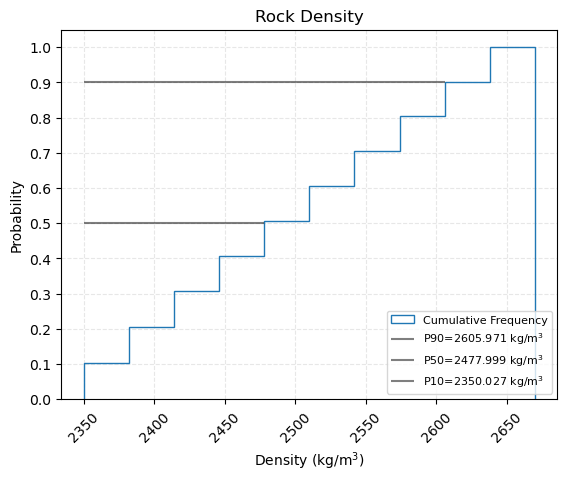

In [8]:
# Plot the CDF
plot = plt.hist(density_rock_arr, histtype="step", 
         density=True, cumulative=1, label="Cumulative Frequency")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(density_rock_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f} kg/m$^3$".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(density_rock_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f} kg/m$^3$".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(density_rock_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f} kg/m$^3$".format(plot[1][x_max_P10]))
plt.title("Rock Density")
plt.xlabel("Density (kg/m$^3$)")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()

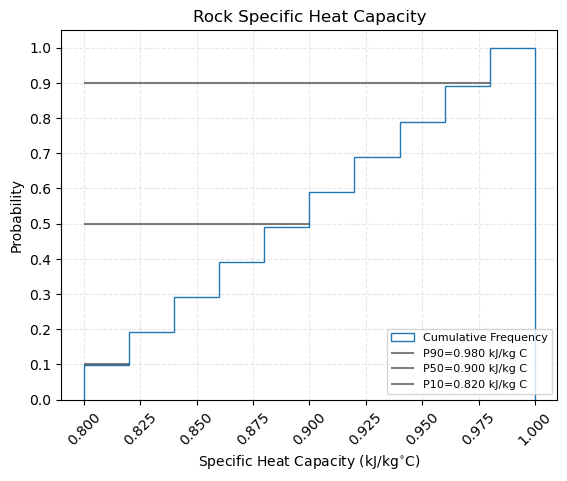

In [9]:
# Plot the CDF
plot = plt.hist(c_rock_arr, histtype="step", 
         density=True, cumulative=1, label="Cumulative Frequency")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(c_rock_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f} kJ/kg C".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(c_rock_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f} kJ/kg C".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(c_rock_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f} kJ/kg C".format(plot[1][x_max_P10]))
plt.title("Rock Specific Heat Capacity")
plt.xlabel("Specific Heat Capacity (kJ/kg$^{\circ}$C)")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()

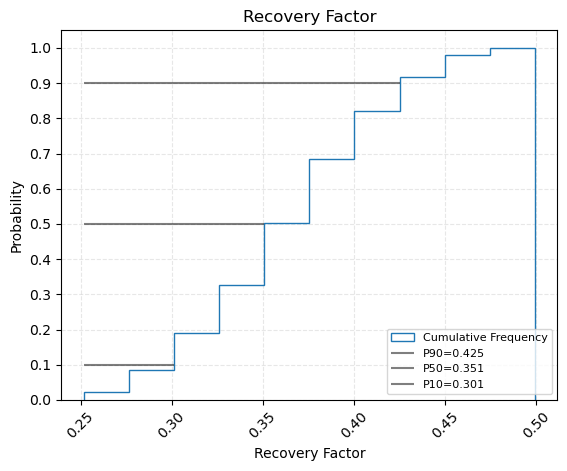

In [10]:
# Plot the CDF
plot = plt.hist(rec_factor_arr, histtype="step", 
         density=True, cumulative=1, label="Cumulative Frequency")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(rec_factor_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f}".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(rec_factor_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f}".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(rec_factor_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f}".format(plot[1][x_max_P10]))
plt.title("Recovery Factor")
plt.xlabel("Recovery Factor")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()

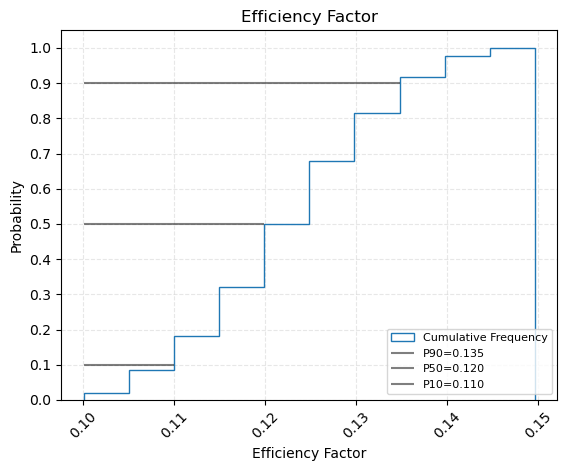

In [11]:
# Plot the CDF
plot = plt.hist(eff_factor_arr, histtype="step", 
         density=True, cumulative=1, label="Cumulative Frequency")
for i in range(len(plot[0])):
    if plot[0][i]>0.9:
        x_max_P90 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.5:
        x_max_P50 = i
        break
for i in range(len(plot[0])):
    if plot[0][i]>0.1:
        x_max_P10 = i
        break
plt.hlines(0.9, min(eff_factor_arr), plot[1][x_max_P90], color="black", linestyle="-", 
           alpha=0.5, label="P90={:.3f}".format(plot[1][x_max_P90]))
plt.hlines(0.5, min(eff_factor_arr), plot[1][x_max_P50], color="black", linestyle="-", 
           alpha=0.5, label="P50={:.3f}".format(plot[1][x_max_P50]))
plt.hlines(0.1, min(eff_factor_arr), plot[1][x_max_P10], color="black", linestyle="-", 
           alpha=0.5, label="P10={:.3f}".format(plot[1][x_max_P10]))
plt.title("Efficiency Factor")
plt.xlabel("Efficiency Factor")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.show()